#Pre-configuration

## Mount Google Drive

In [1]:
# Set up colab instance
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Clone and pull github repository

In [2]:
# Make sure clone at root
%cd /content

!pip3 install pydicom
!git clone https://github.com/thomasp05/gif-705-projet

import os
os.chdir('gif-705-projet')

# Add the local_modules directory to the set of paths
# Python uses to look for imports.
import sys
sys.path.append('/content/gif-705-projet')

/content
fatal: destination path 'gif-705-projet' already exists and is not an empty directory.


Checkout branch

In [3]:
!git checkout "features/data-augmentation" #develop
!git pull

Already on 'features/data-augmentation'
Your branch is up to date with 'origin/features/data-augmentation'.
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (1/1), done.
remote: Total 3 (delta 2), reused 3 (delta 2), pack-reused 0
Unpacking objects: 100% (3/3), done.
From https://github.com/thomasp05/gif-705-projet
   cde9fe9..8c98d8c  features/data-augmentation -> origin/features/data-augmentation
Updating cde9fe9..8c98d8c
Fast-forward
 dataset.py | 71 ++++++++++++++++++++++++++++++++++++++++++++------------------
 1 file changed, 51 insertions(+), 20 deletions(-)


# Imports and load

In [4]:
import time
import random

import torch

from dataset import *

from models import *
import models_parts
from train_helper import *

from torch.optim import lr_scheduler
from torchvision import transforms

torch.manual_seed(111)

## HYPERPARAMETERS

In [5]:
N_EPOCH = 3
start_epoch = 0
BATCH_SIZE = 4
google_drive_path = "/content/drive/My Drive/GIF-7005-Projet/"
checkpoint_path = google_drive_path + "checkpoint/" 

## Load dataset

In [23]:
dataset = dcm_dataset(google_drive_path + 'gif-7005-projet/data', transforms=Downsample())
print("Found {} images".format(len(dataset.img_files)))

Found 26684 images


Split into train and test set, and generate more data using DataAugmentation

In [ ]:
# reduce dataset for testing
dataset.subset()
dataset.subset()
dataset.subset()


In [28]:
train_set, test_set = train_test_split(dataset)


print("Found {} train images".format(len(train_set)))
data_aug = DataAugmentation(num_samples=1)
train_set2 = data_aug(train_set)
print("Found {} train images after data augmentation".format(len(train_set2)))


Found 21 train images
Found 42 train images after data augmentation


## Show original/transformed image and mask

In [29]:
index = 3
img, (target, bounding_box) = train_set2[index]
img2, (target2, bounding_box2) = train_set2[len(train_set)+index]

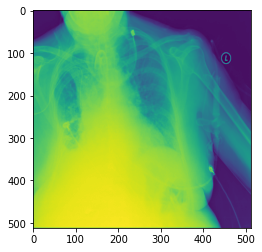

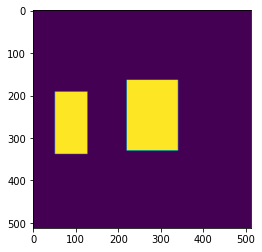

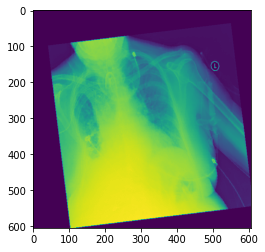

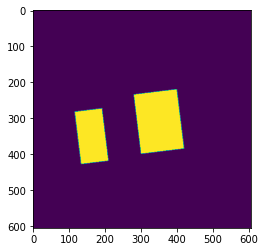

In [30]:
plt.imshow(img.cpu().squeeze())
plt.show()
plt.imshow(bounding_box.cpu().squeeze().numpy())
plt.show()
plt.imshow(img2.cpu().squeeze())
plt.show()
plt.imshow(bounding_box2.cpu().squeeze().numpy())
plt.show()
plt.close()

In [31]:
train_loader = torch.utils.data.DataLoader(
    train_set, batch_size=BATCH_SIZE, num_workers=2)
test_loader = torch.utils.data.DataLoader(
    test_set, batch_size=BATCH_SIZE, num_workers=2)

dataloaders = {
  'train': train_loader,
  'val': test_loader
}

In [32]:
len(train_loader.dataset)

21